In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import os

In [4]:
data = pd.read_csv('/Users/patrickadjei/Desktop/Western Folder/Data Analytics/Assignment1/norway_new_car_sales_by_model.csv',encoding = "ISO-8859-1") #Loading the data

In [5]:
#concatinating the Year and Month and with panda i transform it to an appropriate time series
#I add up the total number of cars sold in the month of year without taking into consideration the Model of the vehicle
dictionaryData2={}
for index, row in data.iterrows():
    if(pd.to_datetime(str(row['Year'])+'-'+str(row['Month'])).date() in dictionaryData2):
        dictionaryData2[pd.to_datetime(str(row['Year'])+'-'+str(row['Month'])).date()] += row['Quantity'];
    else:
        dictionaryData2[pd.to_datetime(str(row['Year'])+'-'+str(row['Month'])).date()] = row['Quantity'];


/Users/patrickadjei/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


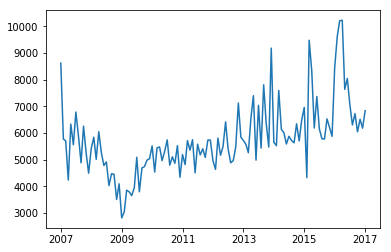

In [6]:
#Plotting the number of sales based on month of the year
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(dictionaryData2.keys(),dictionaryData2.values())

In [7]:
newyvalues=[]
newxvalues=[]
for i in dictionaryData2.values():
    newyvalues.append(math.log(i)); #Applying log on the data to scale it down to hope for a better prediction
for i in dictionaryData2.keys():
    newxvalues.append(i);

df = pd.DataFrame({'Time':newxvalues,'Sale':newyvalues});

df


,Time,Sale
0,2007-01-01,9.061840
1,2007-02-01,8.660601
2,2007-03-01,8.648046
3,2007-04-01,8.349957
4,2007-05-01,8.753056
...,...,...
116,2016-09-01,8.813438
117,2016-10-01,8.706325
118,2016-11-01,8.781402
119,2016-12-01,8.728750


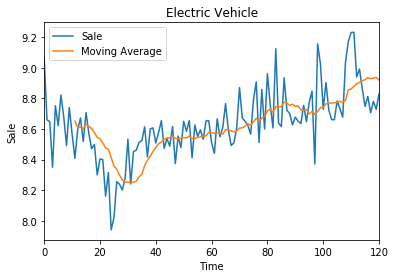

In [8]:
#Comparing the moving avg and the actual graph
df.plot()
df.Sale.rolling(window=12).mean().plot(label='Moving Average',) #Taking the moving average to smooth the curve in order to possibly see a trend.
plt.xlabel('Time')
plt.ylabel('Sale')
plt.title('Electric Vehicle')
plt.legend()

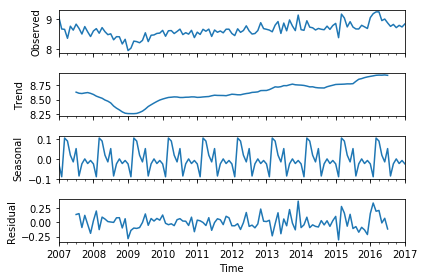

In [9]:
#Getting the trend seasonality and residual
df['Time'] = pd.to_datetime(df['Time']);
df.head()
df = df.set_index('Time');
seasonal_result = seasonal_decompose(df)
seasonal_decompose(df).plot();

/Users/patrickadjei/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Autocorrelation')

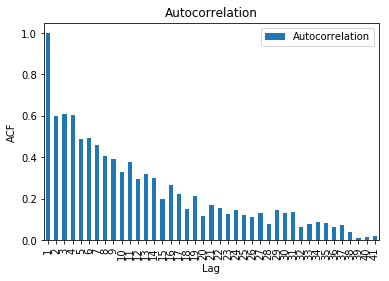

In [10]:
#Getting the auto correlation for the ARIMA parameters
acf_1 = acf(newyvalues)
acf_1_test = pd.DataFrame(acf_1)
acf_1_test.columns = ['Autocorrelation']
acf_1_test.index +=1
acf_1_test.plot(kind='bar')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation')

Text(0.5,1,'Partial Autocorrelation')

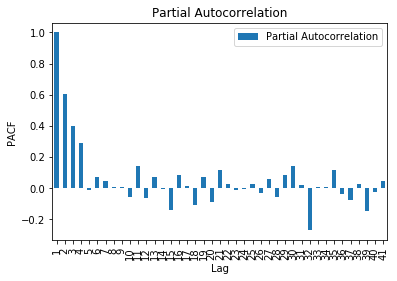

In [11]:
#Getting the partial auto correlation for the ARIMA parameters
pacf_1 = pacf(newyvalues)
pacf_1_test = pd.DataFrame(pacf_1)
pacf_1_test.columns = ['Partial Autocorrelation']
pacf_1_test.index +=1
pacf_1_test.plot(kind='bar')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation')

/Users/patrickadjei/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'First Difference Autocorrelation')

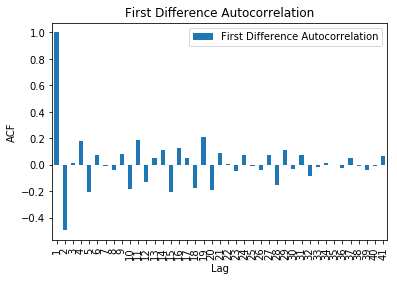

In [12]:
from pandas import Series
#Getting the first Difference of the auto correlation for ARIMA parameters

diff1_newyvalues = newyvalues - Series(newyvalues).shift(1)
diff1 = diff1_newyvalues.dropna()
acf_diff1 = acf(diff1)
acf_diff1_df = pd.DataFrame(acf_diff1)
acf_diff1_df.columns = ['First Difference Autocorrelation']
acf_diff1_df.index +=1
acf_diff1_df.plot(kind='bar')

plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('First Difference Autocorrelation')

Text(0.5,1,'First Difference Partial Autocorrelation')

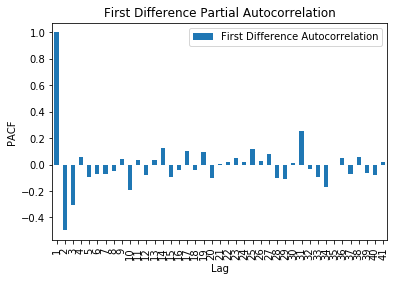

In [13]:
#Getting the first difference of the partial auto correlation for ARIMA parameters
pacf_diff1 = pacf(diff1)
pacf_diff1_df = pd.DataFrame(pacf_diff1)
pacf_diff1_df.columns = ['First Difference Autocorrelation']
pacf_diff1_df.index +=1
pacf_diff1_df.plot(kind='bar')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('First Difference Partial Autocorrelation')


Text(0.5,1,'First Difference')

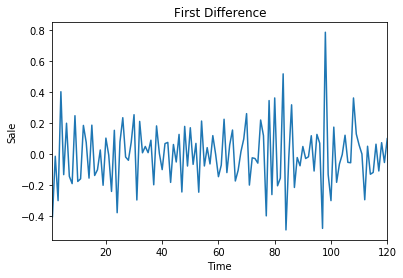

In [14]:
#Ploting the graph after taking the difference
diff1.plot()
plt.xlabel('Time')
plt.ylabel('Sale')
plt.title('First Difference')

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(1, 0)   Log Likelihood                  36.923
Method:                       css-mle   S.D. of innovations              0.178
Date:                Tue, 02 Jun 2020   AIC                            -67.846
Time:                        19:34:40   BIC                            -59.458
Sample:                             0   HQIC                           -64.439
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6405      0.042    206.441      0.000       8.558       8.723
ar.L1.y        0.6178      0.073      8.511      0.000       0.476       0.760
                                    Roots           

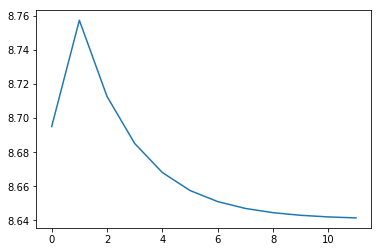

In [15]:
# ploting the ARIMA after a prediction with ARIMA is done
model = ARIMA(newyvalues,(1,0,0))
model = model.fit()
print(model.summary())
predict = model.predict(120,131)

#index_of_fc = np.arange(len(predict), len(predict)+10)
plt.plot(predict,label='predicted')

In [19]:
train = newyvalues[0:110] # we will use this to predict from 2007 to 2016
test = newyvalues[109:] #test is equivalent to the actual from 2016 first month to 2017 first month

In [20]:
train_model = ARIMA(train,(1,0,0)) #using arima model 1 0 0
train_model = train_model.fit()
predict_w_train_model = train_model.predict(109,120)

Text(0.5,1,'Actual vs Predicted')

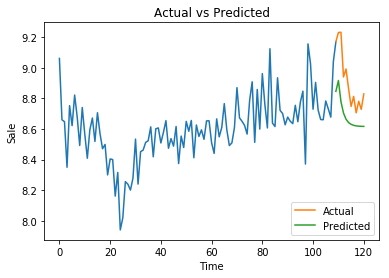

In [21]:
#Comparing the actualy and the predicted
plt.plot(train)
plt.plot(range(109,109+len(test)),test, label='Actual')
plt.plot(range(109,109+len(predict_w_train_model)),predict_w_train_model, label ='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sale')
plt.title('Actual vs Predicted')

In [24]:
#calculating accuracy metrics
RMSE = np.mean((predict_w_train_model - test)**2)**.5 
MAPE = np.mean(np.abs(predict_w_train_model - test)/np.abs(test)) #percentage of the accuracy
print(RMSE)
print(MAPE)

0.2522571263497709
0.025545040938529818


/Users/patrickadjei/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


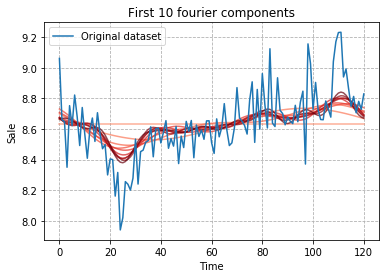

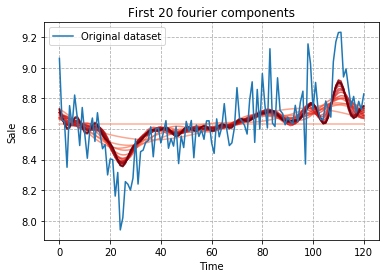

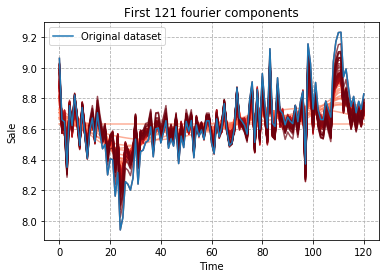

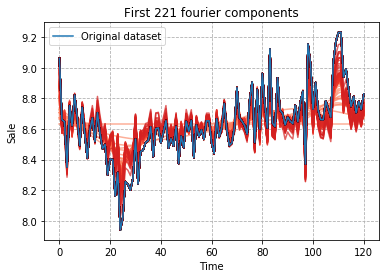

In [32]:
#Still trying to predict
#Doing prediction is fourrier analysis

import scipy.fftpack
df = pd.DataFrame({'Time':range(0,121),'Sale':newyvalues});
n = len(df)

COMPONENTS = [10, 20, n,n+100]

for c in COMPONENTS:
    colors = np.linspace(start=100, stop=255, num=c)
    for i in range(c):
        Y = np.fft.fft(df.Sale)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
        plt.plot(range(0,121), ifft, color=plt.cm.Reds(int(colors[i])), alpha=.70)

    plt.title("First {c} fourier components".format(c=c))
    plt.plot(df.Time,df.Sale, label="Original dataset")
    plt.grid(linestyle='dashed')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Sale')
    plt.show()


In [33]:
#From the fourrier components, we extrapolate

t= range(len(df))
p = np.polyfit(t, df.Sale, 1)         # find linear trend in x
x_notrend = df.Sale - p[0] * t        # remove the trend else the amplitude appear larger than it is
x_freqdom = np.fft.fft(x_notrend)
f = np.fft.fftfreq(n)

j=0
indexedifft=[]
for value in ifft:  #Adding indexes to the array
    indexedifft.append([j,value])
    j+=1
    
indexedifft.sort(key = lambda i: np.absolute(i[1])) #sorting array by value

t = np.arange(0, n+12)     #n+12 so our original lenght plus a 12 month prediction. Scale for the new range

restored_sig = np.zeros(t.size)    #create a vector of zeros for the new output

for i in indexedifft:
    ampli = np.absolute(x_freqdom[i[0]]) / n   # amplitude
    phase = np.angle(x_freqdom[i[0]])          # phase
    restored_sig += ampli * np.cos(2 * np.pi * f[i[0]] * t + phase)
    
predicted = restored_sig

[8620.         5750.09590282 5657.78818745 4184.19974631 6238.78135058
 5454.1357677  6638.8664891  5741.29220497 4737.45247298 6053.04637439
 5065.79415902 4311.41890233]


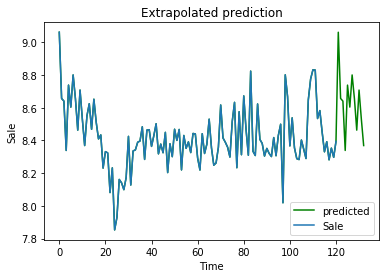

In [35]:
plt.plot(range(0,len(predicted)),predicted, color='green',label = 'predicted') #plot the orginal signal
plt.plot(range(0,len(original)),original,label='Sale') #plot the predicted outcome
plt.xlabel('Time')
plt.ylabel('Sale')
plt.title('Extrapolated prediction')
plt.legend()

print(np.exp(predicted[121:]))

In [39]:
#calculating accuracy metrics
RMSE = np.mean(((predicted_2017[108:]-0.4) - df_test['Sale'])**2)**.5 
MAPE = np.mean(np.abs((predicted_2017[108:]) - df_test['Sale'].values)/np.abs(df_test['Sale'].values)) #percentage of the accuracy

print(RMSE)
print(MAPE)


0.08842984041659531
0.05208705176283511
